# Возьмем функцию x^3^ + 19*x^2^ + 24x  + y^3^+3

In [33]:
target_func = lambda x, y: (
        x ** 3 +
        19 * x ** 2 +
        24 * x +
        y ** 3 +
        3
    # x ** 3 +
    #  19 * x ** 2 * y +
    #  7 * x * y ** 2 +
    #  6 * y **2 +
    #  24 * x * y +
    #  13 * y +
    #  y ** 3 +
    #  3
)

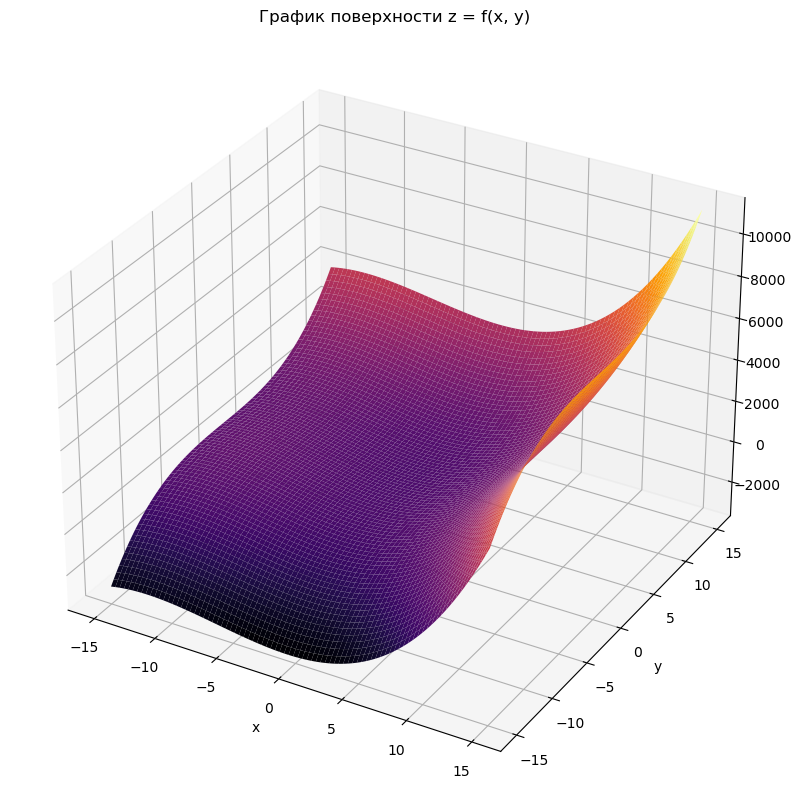

In [34]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x, y = np.meshgrid(
    np.linspace(-15, 15, 250),
    np.linspace(-15, 15, 250),
)

ax.set_title('График поверхности z = f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot_surface(
    x, y, target_func(x, y),
    rstride=3, cstride=3,
    cmap='inferno',
)

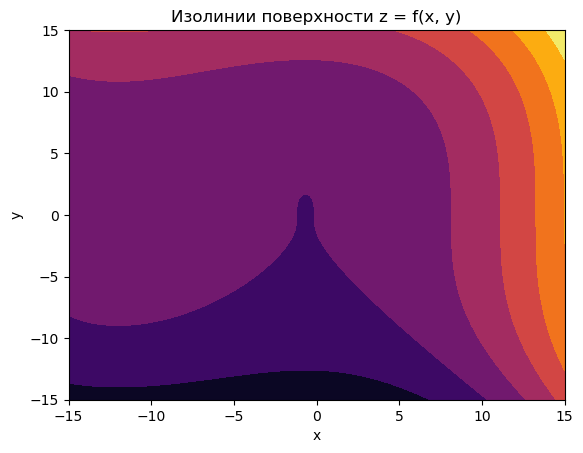

In [35]:
plt.title('Изолинии поверхности z = f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.contourf(x, y, target_func(x, y), cmap='inferno')

# Градиентный спуспк

In [36]:
from sympy import diff
from sympy.abc import x, y

f_ = (
        x ** 3 +
        19 * x ** 2 +
        24 * x +
        y ** 3 +
        3
    # x ** 3 +
    # 19 * x ** 2 * y +
    # 7 * x * y ** 2 +
    # 6 * y ** 2 +
    # 24 * x * y +
    # 13 * y +
    # y ** 3 +
    # 3
)

diff(f_, x)

3*x**2 + 38*x + 24

In [37]:
diff(f_, y)

3*y**2

In [38]:
# Частная производная по x.
partial_derivative_x = lambda x, y: (
        3 * x ** 2 +
        38 * x +
        24
    #3 * x ** 2 +
    #38 * x * y +
    #7 * y ** 2 -
    #24 * y
)

# Частная производная по y.
partial_derivative_y = lambda x, y: (
        3 * y ** 2
    #19 * x ** 2 +
    #14 * x * y +
    #24 * x -
    #3 * y ** 2 +
    #12 * y +
    #13
)

In [41]:
from typing import Tuple
from math import sqrt


def gradient_descent(
        # Начальная точка.
        x, y,
        # Целевая функция.
        func,
        # Частная производная по x.
        partial_derivative_x,
        # Частная производная по y.
        partial_derivative_y,
        learning_rate=0.0001,
        epsilon=1e-4,
        max_epochs=500,
) -> Tuple[list, list, list]:
    x_list, y_list, z_list = [], [], []
    for _ in range(max_epochs):
        x_list.append(x)
        y_list.append(y)
        z_list.append(func(x, y))

        # Вычисляем значения частных производных в точке.
        gradient = (
            partial_derivative_x(x, y),
            partial_derivative_y(x, y),
        )

        if 0.5 * sqrt(gradient[0] ** 2 + gradient[1] ** 2) < epsilon:
            break

        # Обновляем веса в направлении, обратном направлению градиента (умноженному на скорость обучения).
        x += learning_rate * (-gradient[0])
        y += learning_rate * (-gradient[1])

    return x_list, y_list, z_list


x0, y0 = (-9.5, 9.5)

x_results, y_results, z_results = gradient_descent(
    x0, y0,
    target_func,
    partial_derivative_x,
    partial_derivative_y,
)


# Построим график функции

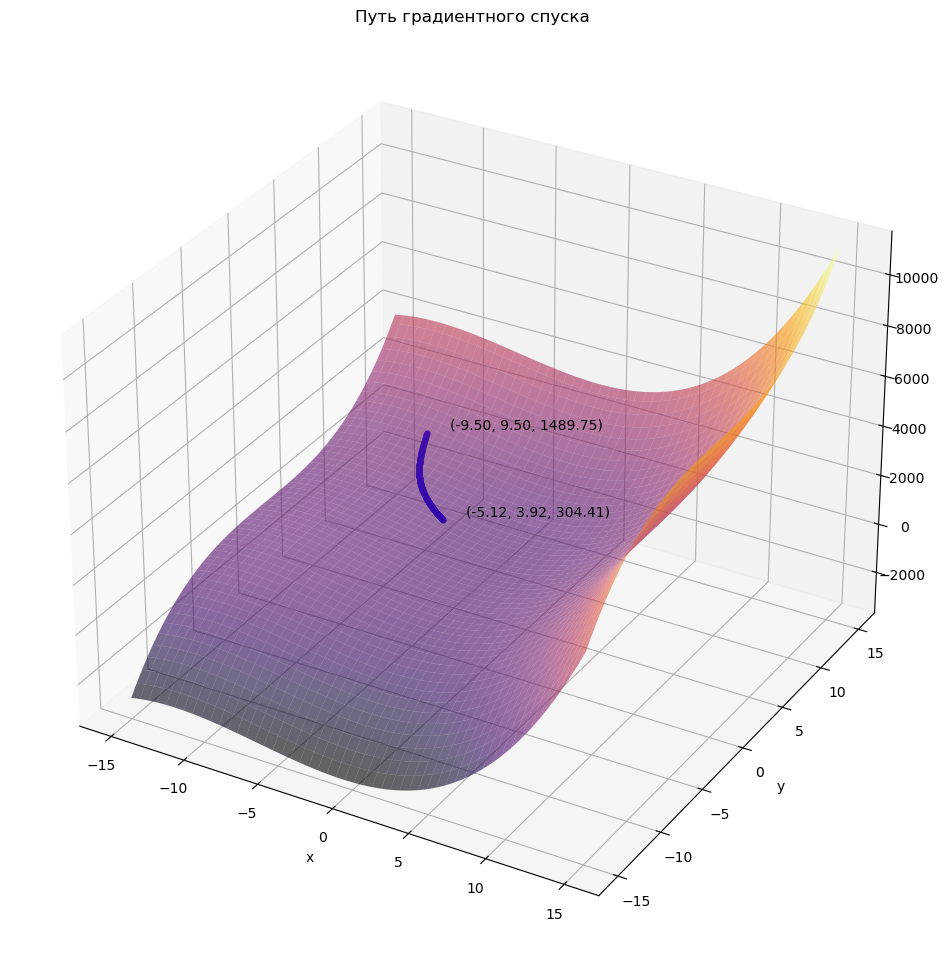

In [42]:
x = np.linspace(-15, 15, 150)
y = np.linspace(-15, 15, 150)

x, y = np.meshgrid(x, y)

f = (
        x ** 3 +
        19 * x ** 2 +
        24 * x +
        y ** 3 +
        3
    #  x ** 3 +
    #  19 * x ** 2 * y +
    #  7 * x * y ** 2 +
    #  6 * y ** 2 +
    #  24 * x * y +
    #  13 * y +
    #  y ** 3 +
    #  3
)

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, f, alpha=0.6, cmap='inferno')

ax.text(
    x0 + 1,
    y0 + 1,
    target_func(x0, y0),
    f'({x0:.2f}, {y0:.2f}, {target_func(x0, y0):.2f})')
ax.text(
    x_results[-1] + 1,
    y_results[-1] + 1,
    z_results[-1],
    f'({x_results[-1]:.2f}, {y_results[-1]:.2f}, {z_results[-1]:.2f})',
)

ax.set_title('Путь градиентного спуска')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot(x_results, y_results, z_results, '.-', c='blue')